# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 12.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
233341,0.1147,0.1465,0.0024,0.0024,0.0024,0.0024,0.0708,0.2197,0.0024,0.1074,0,0,0,0
90229,0.2856,0.5566,0.3247,0.0024,0.0024,0.0024,0.0659,0.6445,0.0146,0.1392,8,8,11,11
106338,0.2100,0.4907,0.3613,0.0220,0.0024,0.0024,0.1514,1.0718,0.0049,0.2441,7,7,1,1
278924,0.0024,0.0049,0.0049,0.0024,0.0024,0.0024,0.0024,0.0488,0.0024,0.0024,9,0,4,0
417854,0.5444,0.1831,0.4492,0.0073,0.0024,0.0146,0.3711,1.5430,0.0024,0.8398,4,4,20,20


In [3]:
raw_data.shape

(460382, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460382 entries, 0 to 460381
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          460382 non-null  float64
 1   Emg2          460382 non-null  float64
 2   Emg3          460382 non-null  float64
 3   Emg4          460382 non-null  float64
 4   Emg5          460382 non-null  float64
 5   Emg6          460382 non-null  float64
 6   Emg7          460382 non-null  float64
 7   Emg8          460382 non-null  float64
 8   Emg9          460382 non-null  float64
 9   Emg10         460382 non-null  float64
 10  repetition    460382 non-null  int64  
 11  rerepetition  460382 non-null  int64  
 12  stimulus      460382 non-null  int64  
 13  restimulus    460382 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.2 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000
mean,0.228323,0.149005,0.158937,0.051782,0.009471,0.009314,0.118619,0.383167,0.090241,0.158943,3.201413,2.333123,5.674920,4.168397
std,0.386383,0.289871,0.354328,0.167727,0.031863,0.031848,0.278554,0.484126,0.287058,0.150671,3.487234,3.297521,6.590112,6.223571
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041500,0.002400,0.002400,0.002400,0.002400,0.002400,0.007300,0.102500,0.002400,0.031700,0.000000,0.000000,0.000000,0.000000
50%,0.087900,0.034200,0.002400,0.002400,0.002400,0.002400,0.048800,0.214800,0.002400,0.141600,2.000000,0.000000,3.000000,0.000000
75%,0.214800,0.161100,0.153800,0.007300,0.002400,0.002400,0.127000,0.505400,0.034200,0.239300,6.000000,5.000000,10.000000,8.000000
max,4.668000,4.668000,4.663100,4.665500,1.171900,0.778800,4.665500,4.668000,4.663100,2.878400,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     192400
4      15502
7      15495
12     15491
8      15487
2      15486
11     15469
9      15465
6      15448
5      15447
3      15425
1      15417
10     15406
14     10334
13     10332
17     10332
15     10293
16     10255
19      5172
18      5169
21      5169
23      5133
20      5130
22      5125
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

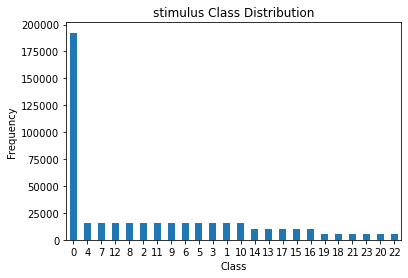

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
48857,0.0610,0.0024,0.0024,0.0024,0.0024,0.0024,0.0146,0.2344,0.0024,0.3149,0,0,0,0
338472,0.0146,0.1025,0.0024,0.0024,0.0024,0.0024,0.1050,0.0342,0.0024,0.0024,0,0,0,0
311478,0.4224,1.0400,0.1782,0.1953,0.0732,0.0684,0.4419,0.9473,0.5298,0.4663,5,5,8,8
198549,0.0244,0.0366,0.1270,0.0024,0.0024,0.0024,0.0586,0.2197,0.0024,0.2856,7,7,12,12
313151,0.3076,0.5566,0.0977,0.0903,0.0269,0.0464,0.4785,0.6152,0.1367,0.5835,7,7,8,8


In [12]:
raw_data.shape

(380069, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380069 entries, 0 to 460381
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          380069 non-null  float64
 1   Emg2          380069 non-null  float64
 2   Emg3          380069 non-null  float64
 3   Emg4          380069 non-null  float64
 4   Emg5          380069 non-null  float64
 5   Emg6          380069 non-null  float64
 6   Emg7          380069 non-null  float64
 7   Emg8          380069 non-null  float64
 8   Emg9          380069 non-null  float64
 9   Emg10         380069 non-null  float64
 10  repetition    380069 non-null  int64  
 11  rerepetition  380069 non-null  int64  
 12  stimulus      380069 non-null  int64  
 13  restimulus    380069 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 51.6 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 81.76388560002104


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     37518
           1       0.75      0.77      0.76      2216
           2       0.71      0.71      0.71      2231
           3       0.75      0.75      0.75      2098
           4       0.70      0.71      0.70      2142
           5       0.73      0.71      0.72      2303
           6       0.77      0.79      0.78      2161
           7       0.69      0.69      0.69      2362
           8       0.74      0.75      0.75      2236
           9       0.73      0.71      0.72      2288
          10       0.73      0.72      0.72      2451
          11       0.74      0.75      0.74      2048
          12       0.64      0.64      0.64      2126
          13       0.68      0.68      0.68      1397
          14       0.63      0.66      0.65      1285
          15       0.64      0.66      0.65      1381
          16       0.71      0.71      0.71      1373
 

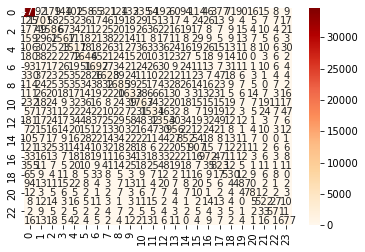

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.4086615623437788
MSE: 16.216881100849843
RMSE: 4.02701888508731


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8177758246696557
Recall Score :  0.8176388560002105
f1_score :  0.817676952594477


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 86.9800299944747


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     37518
           1       0.82      0.85      0.83      2216
           2       0.80      0.78      0.79      2231
           3       0.85      0.80      0.83      2098
           4       0.78      0.79      0.78      2142
           5       0.81      0.80      0.81      2303
           6       0.87      0.84      0.86      2161
           7       0.79      0.73      0.76      2362
           8       0.85      0.83      0.84      2236
           9       0.82      0.81      0.81      2288
          10       0.84      0.75      0.79      2451
          11       0.84      0.80      0.82      2048
          12       0.77      0.70      0.73      2126
          13       0.80      0.75      0.78      1397
          14       0.79      0.67      0.73      1285
          15       0.74      0.71      0.72      1381
          16       0.85      0.77      0.81      1373
 

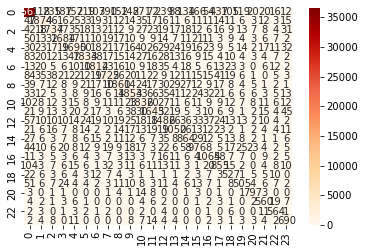

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 1.034690977977741
MSE: 12.150511747835925
RMSE: 3.4857584178821006


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8665796266448141
Recall Score :  0.8698002999447471
f1_score :  0.8666584130021939


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 90.68197963533034


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     37518
           1       0.90      0.88      0.89      2216
           2       0.92      0.83      0.87      2231
           3       0.93      0.84      0.88      2098
           4       0.88      0.86      0.87      2142
           5       0.90      0.85      0.87      2303
           6       0.93      0.88      0.90      2161
           7       0.84      0.79      0.81      2362
           8       0.89      0.88      0.89      2236
           9       0.89      0.85      0.87      2288
          10       0.90      0.82      0.86      2451
          11       0.92      0.89      0.90      2048
          12       0.85      0.78      0.81      2126
          13       0.89      0.83      0.86      1397
          14       0.86      0.75      0.80      1285
          15       0.77      0.81      0.79      1381
          16       0.91      0.85      0.88      1373
 

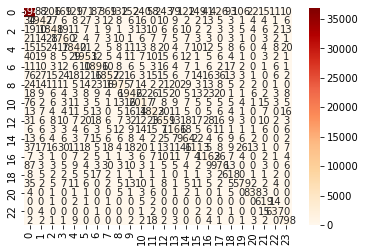

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.7714236851106375
MSE: 9.207632804483385
RMSE: 3.034408147313638


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9057561584613295
Recall Score :  0.9068197963533033
f1_score :  0.904914052832643


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 84.2068566316731


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     37518
           1       0.77      0.78      0.77      2216
           2       0.82      0.69      0.75      2231
           3       0.87      0.74      0.80      2098
           4       0.74      0.74      0.74      2142
           5       0.80      0.72      0.76      2303
           6       0.85      0.81      0.83      2161
           7       0.75      0.69      0.72      2362
           8       0.78      0.74      0.76      2236
           9       0.76      0.73      0.74      2288
          10       0.78      0.70      0.74      2451
          11       0.78      0.75      0.76      2048
          12       0.66      0.59      0.62      2126
          13       0.75      0.66      0.71      1397
          14       0.75      0.64      0.69      1285
          15       0.63      0.71      0.67      1381
          16       0.78      0.72      0.75      1373
 

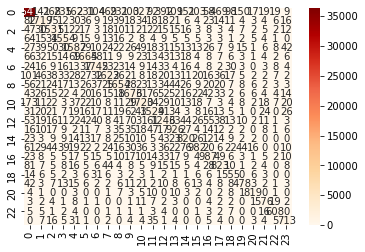

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.2037650959033863
MSE: 13.677309442997343
RMSE: 3.6982846622450984


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8377339365703249
Recall Score :  0.8420685663167311
f1_score :  0.8378484429339591


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 91.30028678927566


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     37518
           1       0.92      0.89      0.91      2216
           2       0.93      0.84      0.88      2231
           3       0.94      0.85      0.90      2098
           4       0.90      0.87      0.88      2142
           5       0.91      0.86      0.89      2303
           6       0.95      0.89      0.92      2161
           7       0.84      0.78      0.81      2362
           8       0.91      0.89      0.90      2236
           9       0.90      0.86      0.88      2288
          10       0.92      0.82      0.87      2451
          11       0.94      0.90      0.92      2048
          12       0.87      0.80      0.83      2126
          13       0.92      0.85      0.88      1397
          14       0.87      0.77      0.82      1285
          15       0.78      0.82      0.80      1381
          16       0.93      0.86      0.89      1373
 

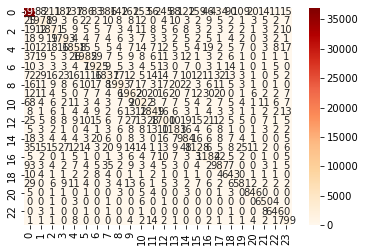

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.7398900202594259
MSE: 8.942063304128187
RMSE: 2.990328293704253


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9124413745951515
Recall Score :  0.9130028678927566
f1_score :  0.9112319778697617
